In [55]:
import pandas as pd

# https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/page/ppr-home-en

In [56]:
df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")
df = df.sample(50000)
df = df.reset_index()

C:\Users\santi\AppData\Local\Temp\ipykernel_1876\1811125323.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")


In [57]:
df.head()

,index,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,84953,10/10/2013,"23 Manor Avenue, Maryborough Ridge, Douglas",Cork,NaN,"165,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,553607,16/08/2022,"53 Mill Avenue, Millerstown, Kilcock",Meath,NaN,"475,770.00",No,Yes,New Dwelling house /Apartment,NaN
2,206025,08/06/2016,"101 ONEILL PARK, CLONES, MONAGHAN",Monaghan,NaN,"50,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,286946,05/12/2017,"CORRACANVY, CAVAN",Cavan,NaN,"290,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,564157,13/10/2022,"74 ASHFIELD RISE, BREMORE, BALBRIGGAN",Dublin,K32FW71,"325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [58]:
df.shape

(50000, 10)

In [59]:
df.isna().sum()


index                            0
Date of Sale (dd/mm/yyyy)        0
Address                          0
County                           0
Eircode                      42404
Price ()                        0
Not Full Market Price            0
VAT Exclusive                    0
Description of Property          0
Property Size Description    45565
dtype: int64

In [60]:
df.columns

Index(['index', 'Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode',
       'Price ()', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [61]:
df['Price'] = df['Price ()']
df['Price'] = df['Price'].str[1:]
df['Price'] = df['Price'].str.replace(',', '')
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

C:\Users\santi\AppData\Local\Temp\ipykernel_1876\2904156962.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('\d+', '')


dropped eircode explain why

In [62]:
df = df[['Address', 'County','Price','Description of Property']]

In [63]:
df['Price'] = df['Price'].astype('float')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  50000 non-null  object 
 1   County                   50000 non-null  object 
 2   Price                    50000 non-null  float64
 3   Description of Property  50000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [65]:
df.County.unique()

array(['Cork', 'Meath', 'Monaghan', 'Cavan', 'Dublin', 'Tipperary',
       'Wicklow', 'Kerry', 'Limerick', 'Waterford', 'Kilkenny', 'Offaly',
       'Kildare', 'Wexford', 'Louth', 'Galway', 'Clare', 'Carlow',
       'Westmeath', 'Donegal', 'Mayo', 'Laois', 'Roscommon', 'Sligo',
       'Longford', 'Leitrim'], dtype=object)

Data transformation address

In [66]:
df['Address'].sample(20)

7412             ARTHUR GRIFFITH PARK LUCAN DUBLIN
47210               HEATHER VIEW TONAPHOBBLE SLIGO
5386             CLONTURK COURT DRUMCONDRA DUBLIN 
15601            B BEAUMONT AVE CHURCHTOWN DUBLIN 
40592                  MILFORD ATHGARVAN NEWBRIDGE
47795                          ABBEYLANDS MILLTOWN
47330              LANDEN ROAD BALLYFERMOT DUBLIN 
46513                        KILMORE KILCOCK MEATH
8548              PORTRUN BALLYMURRAY CO ROSCOMMON
18508                DOLPHIN COURT LOUGHREA GALWAY
30549                     ROCKVIEW DEERPARK CASHEL
12539            HUNTSTOWN WOOD MULHUDDART DUBLIN 
21731     CHAMBERS PARK SHAWBRIDGE KILCOCK KILDARE
27244                OAKFIELD HEIGHTS NAAS KILDARE
16888                     CATLEVIEW BUTTEVANT CORK
6981                    COOLBANE LISCARROLL MALLOW
41760     KILLEGLAND HOUSE KILLEGLAND ST ASHBOURNE
15248     ROS NA GREINE UPPER KILMONEY CARRIGALINE
15530                 GATE LODGE FARRAGHROE KILLOE
15604            APT  THE WATER

In [67]:
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

C:\Users\santi\AppData\Local\Temp\ipykernel_1876\316044791.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('\d+', '')


In [68]:
df['Address'].sample(4)

38498     EGLINTON TERRACE DONNYBROOK DUBLIN 
30754      CLARKES WOOD MOUNT OVAL ROCHESTOWN
34326            FINN EBER SQ FINGLAS DUBLIN 
44980             WOODSTOCK CLADAGH CLASHMORE
Name: Address, dtype: object

In [69]:
df.head()

,Address,County,Price,Description of Property
0,MANOR AVENUE MARYBOROUGH RIDGE DOUGLAS,Cork,165000.0,Second-Hand Dwelling house /Apartment
1,MILL AVENUE MILLERSTOWN KILCOCK,Meath,475770.0,New Dwelling house /Apartment
2,ONEILL PARK CLONES MONAGHAN,Monaghan,50000.0,Second-Hand Dwelling house /Apartment
3,CORRACANVY CAVAN,Cavan,290000.0,Second-Hand Dwelling house /Apartment
4,ASHFIELD RISE BREMORE BALBRIGGAN,Dublin,325000.0,Second-Hand Dwelling house /Apartment


In [70]:
df['Description of Property'] = df['Description of Property'].str.replace('Second-Hand Dwelling house /Apartment', 'Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('New Dwelling house /Apartment', 'New')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Atháimhe','Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Nua','New')
df = df[df['Description of Property'] != 'Teach/?ras?n C?naithe Nua']
df = df.dropna()

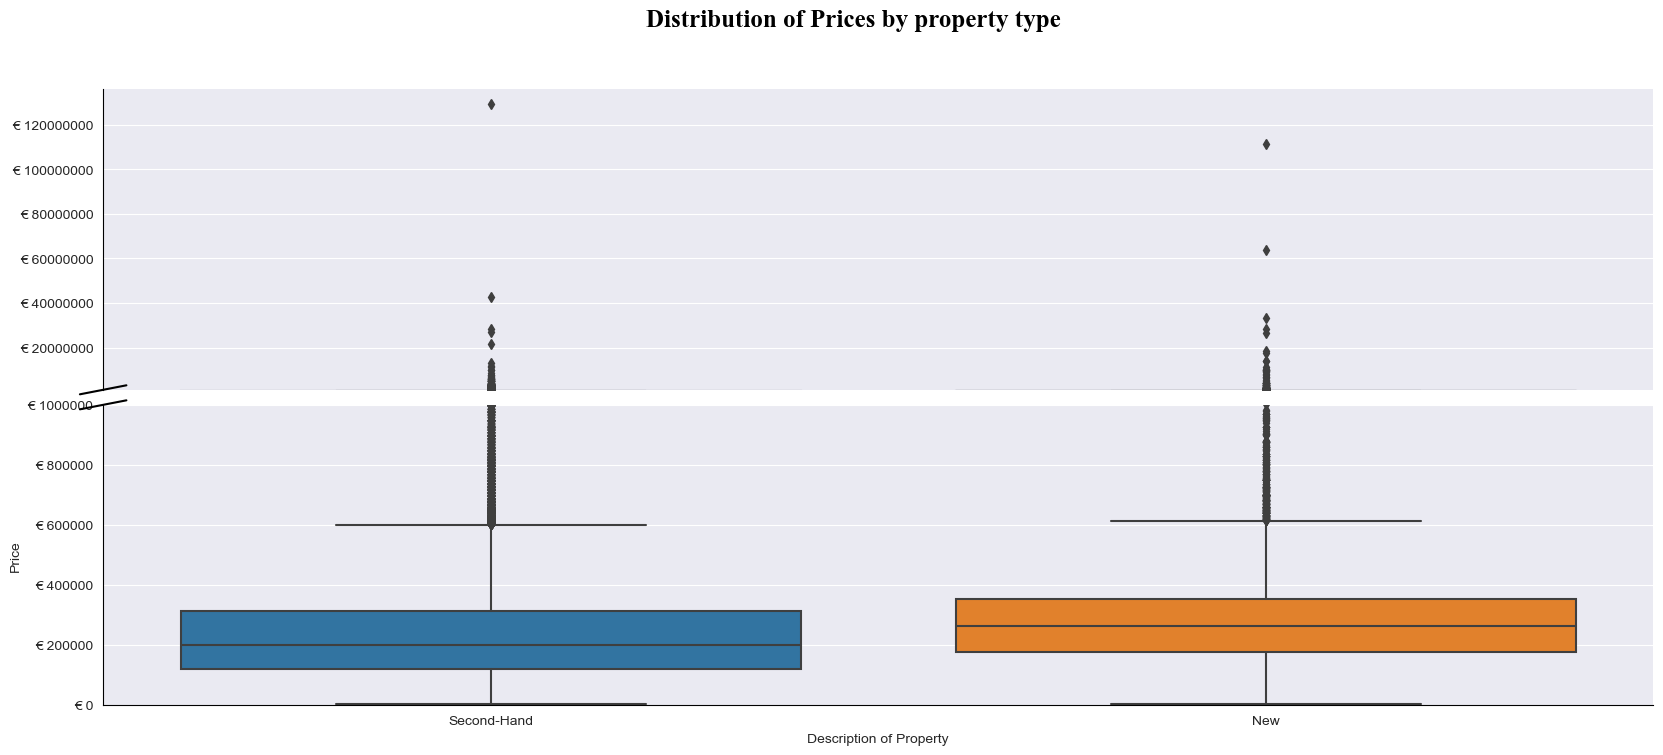

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

custom = {"axes.edgecolor": "black", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05},figsize=(20, 8))
f.suptitle('Distribution of Prices by property type',fontsize=18,color= "black", weight='bold',fontname="Times New Roman")
a = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_bottom)
b = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_top)
ax_top.set_ylim(bottom=1e6) 
ax_bottom.set_ylim(0,1e6)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 

ax_top.set(xlabel=None,ylabel=None)
b.ticklabel_format(style='plain', axis='y')
a.ticklabel_format(style='plain', axis='y')
ax_top.yaxis.set_major_formatter('€ {x:1.0f}')
ax_bottom.yaxis.set_major_formatter('€ {x:1.0f}')
plt.show()



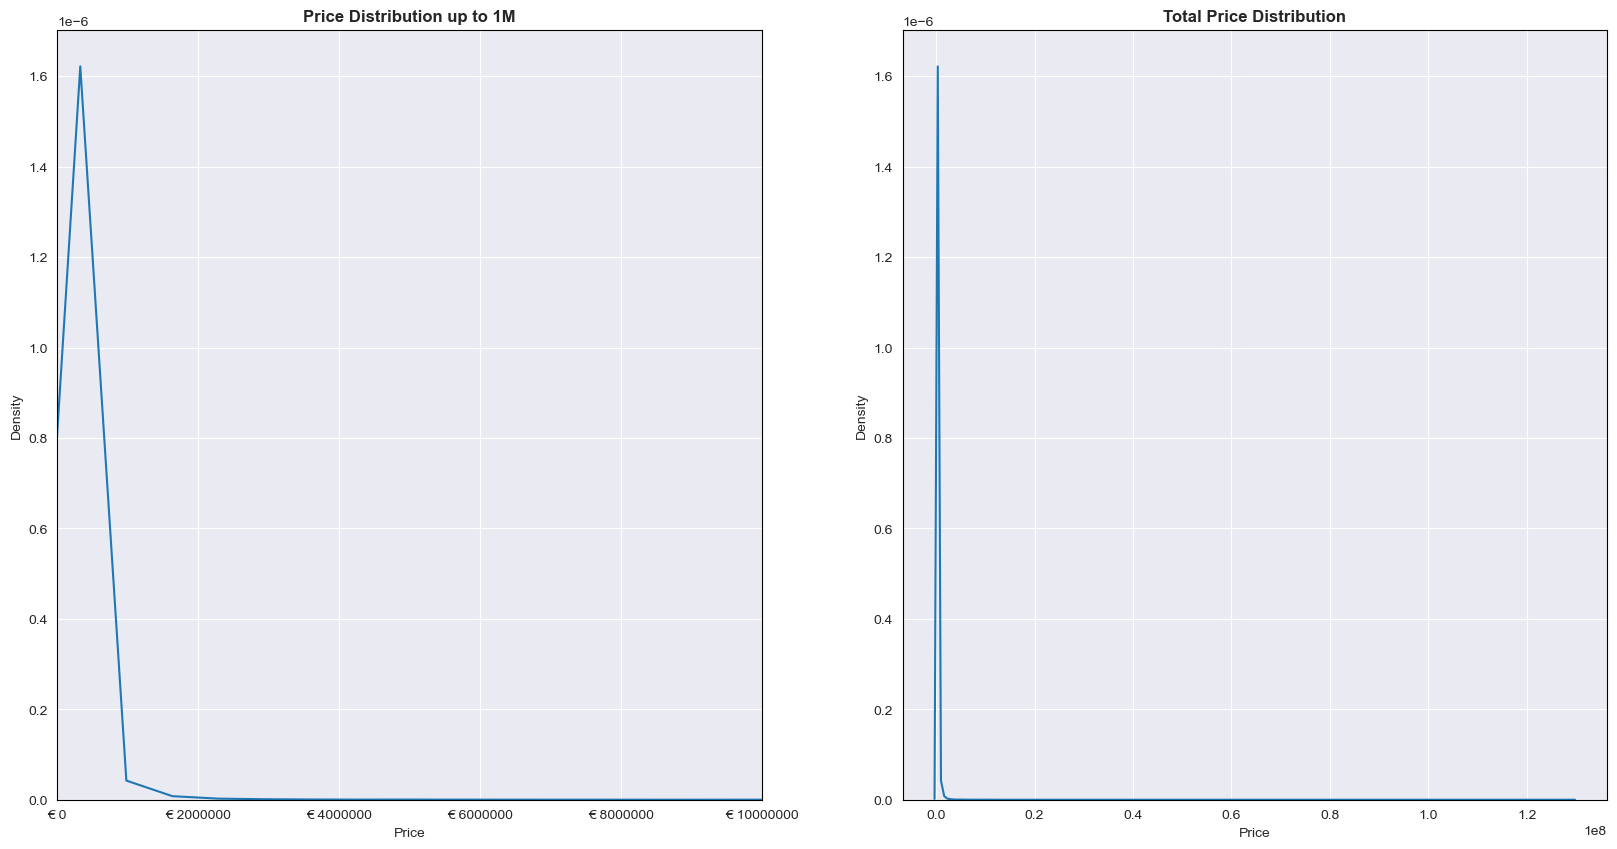

In [72]:
import seaborn as sns

f, axes = plt.subplots(ncols=2, nrows=1,figsize=(20, 10))

plott = sns.kdeplot(df['Price'], ax=axes[0])
plott.set_title('Price Distribution up to 1M', fontweight='bold')
plott.ticklabel_format(style='plain', axis='x')
plott.xaxis.set_major_formatter('€ {x:1.0f}')
plott.set_xlim([0, 10000000])

plott2 = sns.kdeplot(df['Price'], ax=axes[1])
plott2.set_title('Total Price Distribution', fontweight='bold')

plt.show()


In [73]:
from scipy.stats import shapiro,kstest,mannwhitneyu
for x in [df[df['Description of Property'] == 'Second-Hand'],df[df['Description of Property'] == 'New'] ]:
    stat, p = kstest(x['Price'],'norm')
    stat, p2 = shapiro(x['Price'])
    if p>0.05 or p2>0.05:
        print('accept H0')
    else:
        print('reject H0')

    

reject H0
reject H0


c:\Users\santi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [74]:
secon = df[df['Description of Property'] == 'Second-Hand']
new = df[df['Description of Property'] == 'New']

In [75]:
mannwhitneyu(secon['Price'],new['Price'])

MannwhitneyuResult(statistic=136938493.0, pvalue=1.3246544024898942e-204)

In [76]:
secon = []
new = []

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  50000 non-null  object 
 1   County                   50000 non-null  object 
 2   Price                    50000 non-null  float64
 3   Description of Property  50000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


In [78]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text column
bag_of_words = vectorizer.fit_transform(df['Address'])
type(bag_of_words)

# Convert the bag_of_words to a DataFrame
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the desired columns with the bag_of_words DataFrame
df = pd.concat([df, bag_of_words_df], axis=1)

In [79]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

scaler = RobustScaler()

# Select the column you want to scale
column_to_scale = df['Price']

# Reshape the column to match the expected input shape of the scaler
reshaped_column = column_to_scale.values.reshape(-1, 1)

# Apply the scaling transformation to the reshaped column
scaled_column = scaler.fit_transform(reshaped_column)

# Create a new column in the DataFrame with the scaled values
df['Price'] = scaled_column

In [80]:
# cleaning memory
reshaped_column = []
scaled_column = []
bag_of_words_df = []
x = []
column_to_scale = []
y = []

In [81]:
df.drop('Address', axis=1, inplace=True)

In [82]:
df = pd.get_dummies(df, columns=['County'])

In [83]:
df.head()

,Price,Description of Property,abbey,abbeyfeale,abbeylands,abbeyleix,abbeyside,abbot,abhainn,achill,...,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow
0,-0.245287,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.331037,New,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,-0.828604,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,0.388753,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.566284,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.shape

(50000, 1028)

X, Y PCA and train test split

In [85]:
X = df.drop('Description of Property', axis=1)

In [86]:
y = df['Description of Property']

In [87]:
#clean memory
df = []

In [88]:
X = X.dropna()

In [89]:
from sklearn.decomposition import PCA

for comp in range(X.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(X)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.80:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(X)
cluster_df = Final_PCA.transform(X)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))


Using 1 components, we can explain 0.9276321175936475% of the variability in the original data.


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [91]:
Imp = {'value' : rf.feature_importances_, 'Feature': X.columns}
Imp = pd.DataFrame(Imp)
Imp.head()

,value,Feature
0,0.131507,Price
1,0.001661,abbey
2,0.000271,abbeyfeale
3,0.000218,abbeylands
4,0.000233,abbeyleix


0.34689698128366653


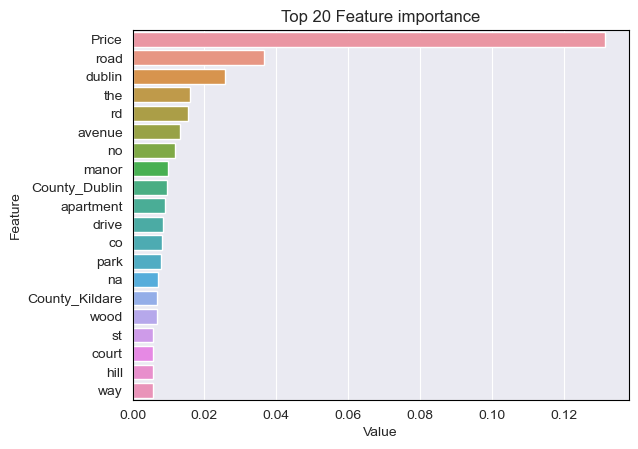

In [92]:
sorted_Imp = Imp.sort_values('value', ascending=False)

# Select the top 10 rows
top_20 = sorted_Imp.head(20)
print(top_20['value'].sum())
# Create the bar plot
sns.barplot(data=top_20, x='value', y='Feature')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature importance')
plt.show()

In [93]:
print(sorted_Imp)

        value      Feature
0    0.131507        Price
814  0.036624         road
357  0.025743       dublin
915  0.016037          the
794  0.015504           rd
..        ...          ...
419  0.000006      francis
76   0.000006    ballybane
376  0.000003       edward
313  0.000001  crossmolina
764  0.000001      portlaw

[1027 rows x 2 columns]


In [94]:
for x in range(1000):
    if sorted_Imp['value'].head(x).sum()>.75:
        print(x)
        break


241


In [95]:
Feature = sorted_Imp['Feature'].head(237)

In [96]:
Feature

0              Price
814             road
357           dublin
915              the
794               rd
            ...     
996         woodview
1021    County_Sligo
538         kilkenny
197     carrickmines
835              rua
Name: Feature, Length: 237, dtype: object

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, X.columns.isin(Feature)], y, test_size=0.25, random_state=42)
X_train.shape

(37500, 237)

In [98]:
from sklearn.metrics import confusion_matrix as confucio
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, roc_auc_score,roc_curve

In [99]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

<AxesSubplot:xlabel='Description of Property', ylabel='count'>

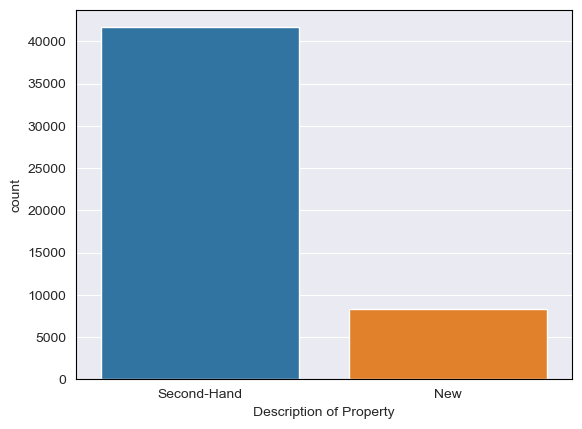

In [100]:
sns.countplot(x = y)

In [101]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= ros.fit_resample(X_train, y_train)

In [102]:
X_train_rus.shape

(12476, 237)

Optimal parameters:
 {'classification__C': 1, 'classification__kernel': 'linear'}
Best mean cross-validated score:
 0.7766914925411298
Elapsed time: 793.59 seconds


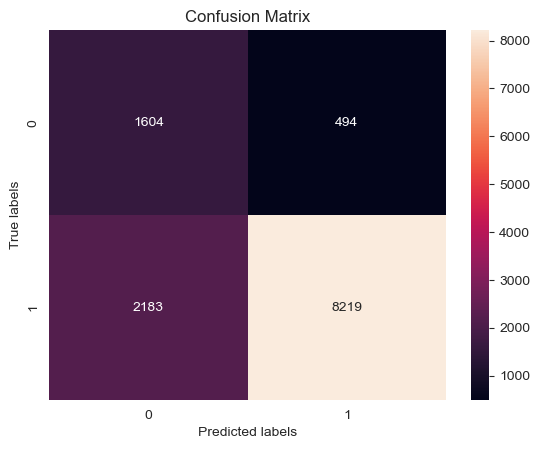

In [103]:
#svm
import time

start_time = time.time()
x = 'Svm'

model = Pipeline([('classification', SVC(random_state=1) )])

grid_params = {'classification__kernel': ['linear', 'poly', 'rbf'],
              'classification__C': [1,0.1,0.01]}

svm_clf = GridSearchCV(estimator=model, param_grid=grid_params, scoring='precision_weighted', cv=5,error_score='raise')

# fit the model
svm_clf.fit(X_train_rus,y_train_rus)

#best parameters,results from grid
svm_clf_best_parameters = svm_clf.best_params_
print("Optimal parameters:\n", svm_clf_best_parameters)
svm_clf_best_result = svm_clf.best_score_ 
print("Best mean cross-validated score:\n", svm_clf_best_result)

#metrics
y_pred= svm_clf.predict(X_test)
#confusion matrix
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

In [104]:
print('Precision: ' +  str(precision_score(y_test, y_pred, average='macro'))) 
print('recall: ' + str(recall_score(y_test, y_pred, average='macro')))
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred , average = 'macro')))


Precision: 0.6834286874421731
recall: 0.7773370835593141
accuracy: 0.78584
F1 score: 0.7025338074717018
